In [2]:
from simulation_functions.KMC_functions import SequenceEnsemble
from fitting_functions.ODE_solving import PetRAFTKineticFitting
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

In [10]:
# feed_ratios = np.array([
#     [17.6, 0., 0.],
#     [11.3, 0.48, 0.85],
#     [6.8, 1.15, 1.77],
#     [7.3, 2.11, 2.58],
#     [9.8, 4.16, 6.78],
#     [7.0, 2.71, 5.53],
#     [19.9, 7.58, 18.48],
# ])

feed_ratios = np.array([
    [30.5, 0., 0.],
    [14.2, 0.61, 0.77],
    [7.8, 2.06, 2.39],
    [6.6, 3.72, 4.16],
    [3.9, 2.36, 4.66],
    [2.9, 1.87, 3.86],
    [3.2, 2.21, 4.72],
])

r_matrix = np.array([
    [1., 1., 1.],
    [1., 1., 1.],
    [1., 1., 1.]
])

Evaluating 'block' number 1
Evaluating 'block' number 2
[ 2.00000000e-03 -5.41233725e-16 -6.52256027e-16]
Evaluating 'block' number 3
[6.36837805e-13 4.89885910e-15 4.13141743e-14]
Evaluating 'block' number 4
[5.04499220e-13 1.87863614e-13 2.36269337e-13]
Evaluating 'block' number 5
[2.07403539e-13 3.77614606e-14 2.91336399e-13]
Evaluating 'block' number 6
[ 9.72694147e-14 -1.54043445e-15  2.02962647e-13]
Evaluating 'block' number 7
[1.30576105e-13 2.13301599e-14 2.97553648e-13]


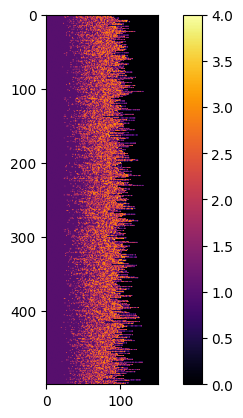

In [11]:
import simulation_functions.KMC_functions
import importlib
importlib.reload(simulation_functions.KMC_functions)
from simulation_functions.KMC_functions import SequenceEnsemble
# feed_ratios = np.array([[27.08, 0.],
#                         [37.41, 7.43],
#                         [26.06, 0.19]])

# r_matrix = np.array([
#     [1., 1.],
#     [1., 1.]
# ])

seq = SequenceEnsemble(500)
all_seqs = seq.run_gradient_copolymer(feed_ratios, 0.05, r_matrix)
# all_seqs = seq.run_block_copolymer(feed_ratios, [0.05, 0.02, 0.02], r_matrix)

# cmap = plt.get_cmap('viridis',5)
# bounds = np.linspace(0,3,4)
# norm = mcolors.BoundaryNorm(bounds, cmap.N)
plt.imshow(all_seqs, cmap='inferno')
plt.colorbar()
plt.show()

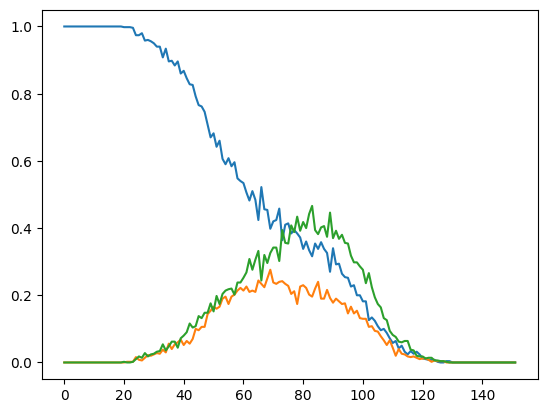

In [12]:
import analysis_functions.sequence_statistics
import importlib
importlib.reload(analysis_functions.sequence_statistics)
from analysis_functions.sequence_statistics import ChainLengthDispersity, MonomerFrequency, ConstructGraph

masses = np.array([87.12, 396.53])

m = MonomerFrequency(all_seqs, 3)
m.plot_frequency()
# m.get_graph()

In [105]:
# peter_data = pd.read_csv('/Users/suprajachittari/Documents/peter/sequence/PDB-4-98_fractions.csv', header=0)
# bridgette_data = pd.read_csv('/Users/suprajachittari/Documents/peter/sequence/B130_MPAM_DMF.csv', header=0)

# plt.scatter(peter_data.iloc[:,0], peter_data.iloc[:,1], label="Bridgette - by hand")
# plt.scatter(bridgette_data.iloc[:,0], bridgette_data.iloc[:,1], label="Peter - online")
# plt.ylim([0,1])
# plt.xlabel("Total conversion")
# plt.ylabel("MPAM conversion")
# plt.legend()
# plt.savefig("comparison.png")

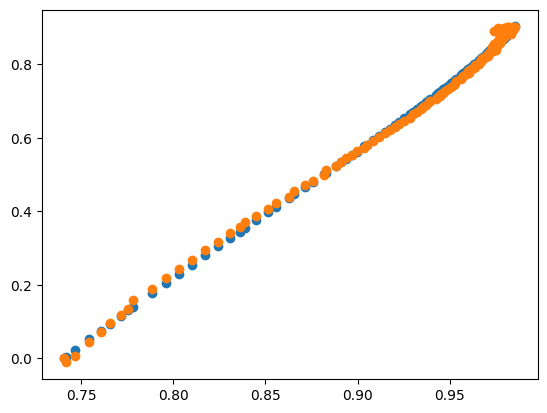

(<Parameter 'r_A', value=0.43873639859531977 +/- 0.00466, bounds=[0:1]>,
 <Parameter 'r_B', value=3.985214462474093 +/- 0.0942, bounds=[1.5:5]>)

In [18]:
import fitting_functions.traditional_methods
import importlib
importlib.reload(fitting_functions.traditional_methods)
from fitting_functions.traditional_methods import MeyerLoweryFitting

# f = PetRAFTKineticFitting(peter_data, 97.95, 34.29) # for Peter
# f = PetRAFTKineticFitting(bridgette_data, 88.1, 31.64) # for Bridgette
# f = PetRAFTKineticFitting(bridgette_data, 70., 30.) 
# f.test_values(1, 50, 50, 1)
# f.display_overlay([1, 2, 1, 10])
# f.extract_rates(0.5, 10)

peter_data = pd.read_excel('/Users/suprajachittari/Documents/peter/sequence/PDB-4-098_conversion.xlsx', header=0)
f = MeyerLoweryFitting()
f.extract_rates(peter_data)

In [ ]:
import fitting_functions.threemonomer
import importlib
importlib.reload(fitting_functions.threemonomer)
from fitting_functions.threemonomer import ThreeMonomerThermalRAFTKineticFitting

exp_data = pd.read_csv('/Users/suprajachittari/Documents/peter/sequence/SC_tba_ba_NIPAM.csv')

p = ThreeMonomerThermalRAFTKineticFitting(exp_data, 69.8, 22.6, 5.7)
p.extract_rates(1,1,1,1,1,1)
# p.display_overlay([1.48, 1.17, 0.832, 1.057, 0.951, 1.036])
# p.display_overlay([1.3854372, 1.1193374, 0.7749093, 1.04711232, 0.95000449, 1.0367488])

# p = ThreeMonomerReducedFitting(exp_data, 69.8, 22.6, 5.7)
# p._fitting()